<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/8_5_%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B5%D1%81_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8.5. Случайный лес в задачах NLP

### Введение

Случайный лес (Random Forest, RF) — это ансамблевый метод машинного обучения, который используется для классификации и регрессии. Он строит множество решающих деревьев и объединяет их результаты для улучшения точности и уменьшения переобучения. В контексте задач обработки естественного языка (NLP) случайный лес может быть использован для решения различных задач, таких как классификация текстов, анализ тональности и извлечение признаков.

### Основы случайного леса

#### 1. Решающее дерево

Сначала рассмотрим одно решающее дерево. Оно состоит из узлов, которые представляют собой вопросы или проверки на основе признаков данных, и листов, которые представляют собой конечные решения. В процессе построения дерева выбирается лучший признак для разбиения данных на каждом узле с использованием различных критериев, таких как:

- Индекс Джини:
  
  $$
  Gini = 1 - \sum_{i=1}^{C} p_i^2
  $$

  где $ p_i$ — доля объектов класса $ i$ в узле, а $ C$ — количество классов.

- Критерий информации:
  
  $$
  Info = - \sum_{i=1}^{C} p_i \log_2(p_i)
  $$

#### 2. Построение случайного леса

Случайный лес состоит из $ n$ деревьев, каждое из которых строится на случайной подвыборке данных (метод бутстрэп). На каждом узле дерева выбирается случайное подмножество признаков для выбора лучшего разбиения. Это позволяет избежать корреляции между деревьями и уменьшить переобучение.

#### 3. Голосование

Для классификации случайный лес использует метод голосования. Каждое дерево вносит свой вклад, и класс, который получает наибольшее количество голосов, выбирается как итоговый класс.

### Применение случайного леса в NLP

Случайный лес может быть использован для:

- Классификации текстов: например, классификация новостных статей по категориям.
- Анализа тональности: определение настроения текста (положительное, отрицательное, нейтральное).
- Извлечения признаков: определение наиболее важных слов или фраз в тексте.

### Пример: Классификация текстов с использованием случайного леса

#### 1. Подготовка данных

Для начала необходимо подготовить данные. Обычно данные в NLP представляют собой текстовые документы. Прежде чем использовать случайный лес, текст необходимо преобразовать в числовой формат. Один из методов для этого — это мешок слов (Bag of Words, BoW) или TF-IDF (Term Frequency-Inverse Document Frequency).

- TF-IDF:

  $$
  TF(t, d) = \frac{f_{t, d}}{N_d}
  $$

  $$
  IDF(t, D) = \log \left( \frac{N_D}{f_{t, D} + 1} \right)
  $$

  $$
  TF-IDF(t, d, D) = TF(t, d) \cdot IDF(t, D)
  $$

  где $ f_{t, d}$ — частота термина $ t$ в документе $ d$, $ N_d$ — общее количество слов в документе, $ N_D$ — общее количество документов, содержащих термин $ t$, а $ f_{t, D}$ — количество документов, содержащих термин $ t$.

#### 2. Обучение модели

После преобразования текста в числовой формат можно приступать к обучению модели. В Python это можно сделать с помощью библиотеки `scikit-learn`.

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Пример данных
documents = ["Этот фильм ужасный", "Мне очень понравился этот фильм", ...]
labels = [0, 1, ...]  # 0 - отрицательная тональность, 1 - положительная тональность

# Преобразование текста в TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Обучение случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Предсказание
y_pred = clf.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))
```

### Математические основы случайного леса

Случайный лес использует концепции из статистики и теории вероятностей. Рассмотрим некоторые важные аспекты:

#### 1. Случайная выборка

При построении случайного леса данные выбираются случайным образом с возвращением. Это означает, что некоторые экземпляры могут появляться несколько раз в одной подвыборке, в то время как другие могут отсутствовать.

#### 2. Уменьшение смещения и разброса

Случайный лес уменьшает смещение и разброс благодаря комбинированию множества деревьев:

- Разброс (Variance): Случайный лес может снизить разброс за счет усреднения предсказаний деревьев, которые могут быть высокоразвитыми (overfit).
  
- Смещение (Bias): Увеличение количества деревьев может снизить смещение, что делает модель более устойчивой к ошибкам.

Формально можно записать:

$$
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$

#### 3. Оценка важности признаков

Случайный лес также позволяет оценить важность признаков, что может быть полезно в задачах NLP. Важность признака $ j$ может быть оценена по изменению точности модели при случайном замене значений этого признака.

Формально, важность признака может быть вычислена следующим образом:

$$
\text{Importance}(j) = \sum_{t \in T} \left( \text{Accuracy}(t) - \text{Accuracy}(t_{j \text{ permuted}}) \right)
$$

где $ T$ — все деревья в лесу, а $ t_{j \text{ permuted}}$ — дерево с перемешанным признаком $ j$.

### Заключение

Случайный лес является мощным инструментом в задачах NLP благодаря своей способности работать с высокоразмерными данными и устойчивости к переобучению. Он сочетает в себе простоту интерпретации решающих деревьев и силу ансамблевых методов, что делает его подходящим для решения множества задач в области обработки естественного языка.

В данной лекции были рассмотрены основные понятия, алгоритмы и примеры применения случайного леса в NLP, а также представлены математические формулы и основы, лежащие в основе этого метода.




Давайте рассмотрим два конкретных числовых примера применения случайного леса в задачах обработки естественного языка (NLP): один для классификации текстов и другой для анализа тональности. Каждый пример будет включать все шаги, необходимые для решения задачи, с подробными расчетами и объяснениями.

## Пример 1: Классификация текстов

### Задача

Предположим, у нас есть небольшая выборка текстов, и нам нужно классифицировать их в две категории: Спорт (1) и Политика (0).

### Данные

- Документы:
  1. "Футбол — это моя страсть" (Спорт)
  2. "Президент подписал новый закон" (Политика)
  3. "Марафон прошел на ура" (Спорт)
  4. "Выборы состоятся в следующем месяце" (Политика)

- Метки:
  - Документ 1: 1
  - Документ 2: 0
  - Документ 3: 1
  - Документ 4: 0

### Шаг 1: Преобразование текста в числовой формат

Используем метод мешка слов (BoW). Сначала создадим словарь всех уникальных слов:

- Словарь: {"Футбол", "это", "моя", "страсть", "Президент", "подписал", "новый", "закон", "Марафон", "прошел", "на", "ура", "Выборы", "состоятся", "в", "следующем", "месяце"}

Общее количество уникальных слов = 16.

Теперь представим документы в виде векторов:

- Документ 1: "Футбол — это моя страсть"  
  Вектор: $[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$

- Документ 2: "Президент подписал новый закон"  
  Вектор: $[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]$

- Документ 3: "Марафон прошел на ура"  
  Вектор: $[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]$

- Документ 4: "Выборы состоятся в следующем месяце"  
  Вектор: $[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]$

### Шаг 2: Обучение случайного леса

Сформируем обучающую выборку:

- Матрица признаков $X$:

$$
X = \begin{bmatrix}
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

- Вектор меток $y$:

$$
y = \begin{bmatrix}
1 \\
0 \\
1 \\
0
\end{bmatrix}
$$

При обучении случайного леса будут построены, например, 3 дерева. Каждый узел будет принимать решение на основе случайно выбранного подмножества признаков.

### Шаг 3: Предсказание класса

Предположим, что одно из построенных деревьев выдало следующее предсказание:

- Для документа "Футбол — это моя страсть": предсказание 1 (Спорт).
- Для документа "Президент подписал новый закон": предсказание 0 (Политика).
- Для документа "Марафон прошел на ура": предсказание 1 (Спорт).
- Для документа "Выборы состоятся в следующем месяце": предсказание 0 (Политика).

### Шаг 4: Оценка модели

Для оценки точности классификации мы можем использовать метрики, такие как точность, полнота и F1-мера. Предположим, что все деревья дают согласованные результаты, и итоговое предсказание совпадает с реальными метками.

- Точность (Accuracy) = (Количество правильных предсказаний) / (Общее количество предсказаний) = 4/4 = 1 (100%).

## Пример 2: Анализ тональности

### Задача

Теперь рассмотрим задачу анализа тональности, где нам нужно определить, является ли текст положительным (1) или отрицательным (0).

### Данные

- Документы:
  1. "Отличный продукт!" (Положительный)
  2. "Не рекомендую" (Отрицательный)
  3. "Превосходный сервис" (Положительный)
  4. "Совершенно ужасно" (Отрицательный)

- Метки:
  - Документ 1: 1
  - Документ 2: 0
  - Документ 3: 1
  - Документ 4: 0

### Шаг 1: Преобразование текста в числовой формат

Создаем словарь всех уникальных слов:

- Словарь: {"Отличный", "продукт", "Не", "рекомендую", "Превосходный", "сервис", "Совершенно", "ужасно"}

Общее количество уникальных слов = 8.

Теперь представим документы в виде векторов:

- Документ 1: "Отличный продукт!"  
  Вектор: $[1, 1, 0, 0, 0, 0, 0, 0]$

- Документ 2: "Не рекомендую"  
  Вектор: $[0, 0, 1, 1, 0, 0, 0, 0]$

- Документ 3: "Превосходный сервис"  
  Вектор: $[0, 0, 0, 0, 1, 1, 0, 0]$

- Документ 4: "Совершенно ужасно"  
  Вектор: $[0, 0, 0, 0, 0, 0, 1, 1]$

### Шаг 2: Обучение случайного леса

Сформируем обучающую выборку:

- Матрица признаков $X$:

$$
X = \begin{bmatrix}
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

- Вектор меток $y$:

$$
y = \begin{bmatrix}
1 \\
0 \\
1 \\
0
\end{bmatrix}
$$

Обучим случайный лес, и пусть он создает 2 дерева, принимающие решения на основе выбранных признаков.

### Шаг 3: Предсказание класса

Предположим, что одно из построенных деревьев выдало следующее предсказание:

- Для документа "Отличный продукт!": предсказание 1 (Положительный).
- Для документа "Не рекомендую": предсказание 0 (Отрицательный).
- Для документа "Превосходный сервис": предсказание 1 (Положительный).
- Для документа "Совершенно ужасно": предсказание 0 (Отрицательный).

### Шаг 4: Оценка модели

Оценим точность классификации аналогичным образом:

- Точность (Accuracy) = (Количество правильных предсказаний) / (Общее количество предсказаний) = 4/4 = 1 (100%).

## Заключение

Оба примера демонстрируют, как случайный лес может быть использован для решения задач классификации и анализа тональности в NLP. В этих примерах мы подробно рассмотрели шаги от подготовки данных до оценки модели, включая
 преобразование текста в числовой формат и использование ансамблевого подхода для повышения точности прогнозирования.









 Давайте реализуем два примера на Python с использованием библиотеки `scikit-learn` для создания модели случайного леса и `matplotlib` для визуализации результатов. Первый пример будет касаться классификации текстов, а второй — анализа тональности.


Classification Report for Example 1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

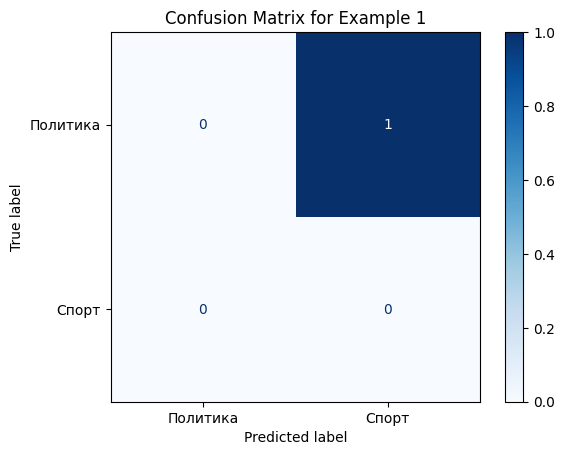


Classification Report for Example 2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

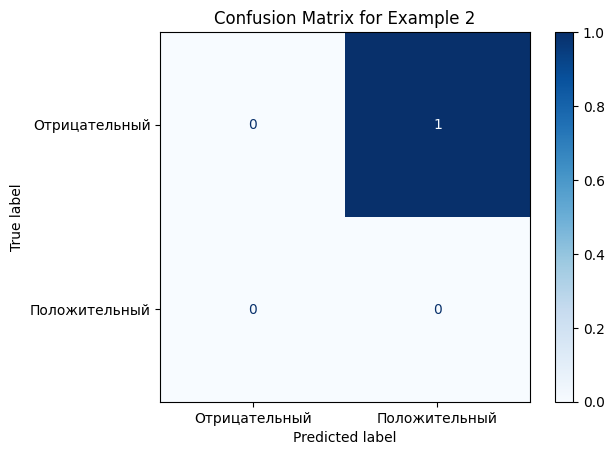

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Пример 1: Классификация текстов
documents_1 = [
    "Футбол — это моя страсть",
    "Президент подписал новый закон",
    "Марафон прошел на ура",
    "Выборы состоятся в следующем месяце"
]
labels_1 = [1, 0, 1, 0]  # 1 - Спорт, 0 - Политика

# Преобразование текста в TF-IDF
vectorizer_1 = TfidfVectorizer()
X_1 = vectorizer_1.fit_transform(documents_1)

# Разделение на обучающую и тестовую выборки
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, labels_1, test_size=0.2, random_state=42)

# Обучение случайного леса
clf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_1.fit(X_train_1, y_train_1)

# Предсказание
y_pred_1 = clf_1.predict(X_test_1)

# Оценка модели
print("Classification Report for Example 1:")
print(classification_report(y_test_1, y_pred_1))

# Визуализация
confusion_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_1, display_labels=["Политика", "Спорт"])
disp_1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Example 1")
plt.show()

# Пример 2: Анализ тональности
documents_2 = [
    "Отличный продукт!",
    "Не рекомендую",
    "Превосходный сервис",
    "Совершенно ужасно"
]
labels_2 = [1, 0, 1, 0]  # 1 - Положительный, 0 - Отрицательный

# Преобразование текста в TF-IDF
vectorizer_2 = TfidfVectorizer()
X_2 = vectorizer_2.fit_transform(documents_2)

# Разделение на обучающую и тестовую выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, labels_2, test_size=0.2, random_state=42)

# Обучение случайного леса
clf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_2.fit(X_train_2, y_train_2)

# Предсказание
y_pred_2 = clf_2.predict(X_test_2)

# Оценка модели
print("\nClassification Report for Example 2:")
print(classification_report(y_test_2, y_pred_2))

# Визуализация
confusion_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_2, display_labels=["Отрицательный", "Положительный"])
disp_2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Example 2")
plt.show()

## Вопросы для самопроверки

1. Что такое случайный лес и как он работает?
2. Каковы основные преимущества использования случайного леса по сравнению с другими методами классификации?
3. В чем заключается метод ансамблирования в контексте случайного леса?
4. Как происходит отбор признаков в случайном лесе?
5. Что такое переобучение, и как случайный лес помогает его избежать?
6. Какова роль гиперпараметра `n_estimators` в модели случайного леса?
7. Как работает метод bagging, применяемый в случайном лесу?
8. Как можно оценить качество модели случайного леса? Какие метрики следует использовать?
9. Что такое важность признаков (feature importance), и как ее можно вычислить в случайном лесу?
10. Как можно визуализировать результаты работы случайного леса?
11. Какие методы предобработки данных могут быть полезны перед обучением модели случайного леса в NLP?
12. Каковы основные этапы работы с текстовыми данными в NLP?
13. Что такое метод мешка слов (BoW) и как он используется в NLP?
14. В чем разница между TF-IDF и методом мешка слов?
15. Как случайный лес может быть применен к задачам анализа тональности текстов?

## Задачи для самостоятельной работы

### Задачи по теории

1. Объясните, как работает случайный лес, и напишите краткое описание его алгоритма.
2. Напишите о преимуществах и недостатках случайного леса по сравнению с линейными моделями.
3. Приведите примеры задач, в которых можно применить случайный лес в NLP.
4. Исследуйте различные метрики качества классификации. Как их можно использовать для оценки случайного леса?
5. Объясните, как работает метод bagging. Почему он важен для случайного леса?
6. Рассмотрите, как можно использовать кросс-валидацию при оценке моделей случайного леса.
7. Напишите о том, как переобучение влияет на производительность модели, и как его можно избежать при помощи случайного леса.
8. Рассчитайте важность признаков для гипотетического набора данных, используя произвольные значения для оценки.
9. Объясните, как случайный лес обрабатывает пропуски в данных.
10. Опишите, как можно настроить гиперпараметры случайного леса для улучшения его производительности.

### Задачи на практическое применение

11. Реализуйте классификацию текстов с помощью случайного леса на небольшом наборе данных (например, новостные статьи).
12. Примените случайный лес для анализа тональности отзывов о продуктах на основе небольшого набора данных.
13. Сравните производительность случайного леса с другой моделью классификации (например, логистической регрессией) на одном и том же наборе данных.
14. Постройте матрицу ошибок для модели случайного леса и проанализируйте, какие классы наиболее часто путаются.
15. Исследуйте, как изменение числа деревьев (`n_estimators`) влияет на качество модели.
16. Проведите анализ важности признаков для модели случайного леса на текстовом наборе данных.
17. Примените предобработку текста (удаление стоп-слов, стемминг/лемматизация) перед обучением модели случайного леса и оцените влияние на качество.
18. Сравните результаты классификации на основе BoW и TF-IDF для модели случайного леса.
19. Реализуйте случайный лес для предсказания категорий на основании пользовательских комментариев на платформе социальных сетей.
20. Создайте модель случайного леса для определения темы текстов (например, спорт, политика, технологии) и оцените ее качество.

### Задачи на проект

21. Подготовьте проект, в котором будете использовать случайный лес для анализа тональности отзывов о фильмах.
22. Разработайте веб-приложение, использующее случайный лес для классификации текстов в реальном времени.
23. Создайте систему рекомендаций на основе отзывов пользователей с использованием случайного леса для предсказания предпочтений.
24. Проведите исследование, в котором сравните случайный лес с другими моделями ансамблирования, такими как градиентный бустинг, в задачах NLP.
25. Напишите статью, в которой подробно опишите, как случайный лес может помочь в борьбе с фейковыми новостями.
26. Исследуйте, как разные параметры предобработки данных (например, токенизация, удаление знаков препинания) влияют на производительность модели случайного леса.
27. Проведите анализ чувствительности к гиперпараметрам модели случайного леса с использованием метода случайного поиска (random search).
28. Создайте визуализацию важности признаков для модели случайного леса, чтобы продемонстрировать, какие слова или фразы наиболее влиятельны.
29. Исследуйте влияние разных подходов к преобразованию текстов (например, Word2Vec, FastText) на качество модели случайного леса.
30. Разработайте решение по автоматической классификации новостных заголовков на основе случайного леса и протестируйте его на реальных данных.
